In [2]:
setwd('/import/liujing/data2/')

In [18]:
load('cibersort.rda')

In [20]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [21]:
im_ssgsea2 = im_ssgsea %>% dplyr::select(-group) 

In [ ]:
group1 = read.csv('./resultstrain/resultstrain.k=2.consensusClass.csv',header =F)



group1$V2 = paste0('subtype',group1$V2)

colnames(group1) = c('ID','group')

count = dplyr::left_join(group1,im_ssgsea2,by = 'ID')

In [37]:
library(tidyHeatmap)
library(tidyverse)
library(RColorBrewer)

In [38]:
cibersort_long <- count %>% 
  select(Correlation_CIBERSORT, RMSE_CIBERSORT,ID,everything()) %>% 
  pivot_longer(- c(1:4),names_to = "cell_type",values_to = "fraction") %>% 
  dplyr::mutate(cell_type = gsub("_CIBERSORT","",cell_type),
                cell_type = gsub("_"," ",cell_type))

In [43]:
library(IOBR)

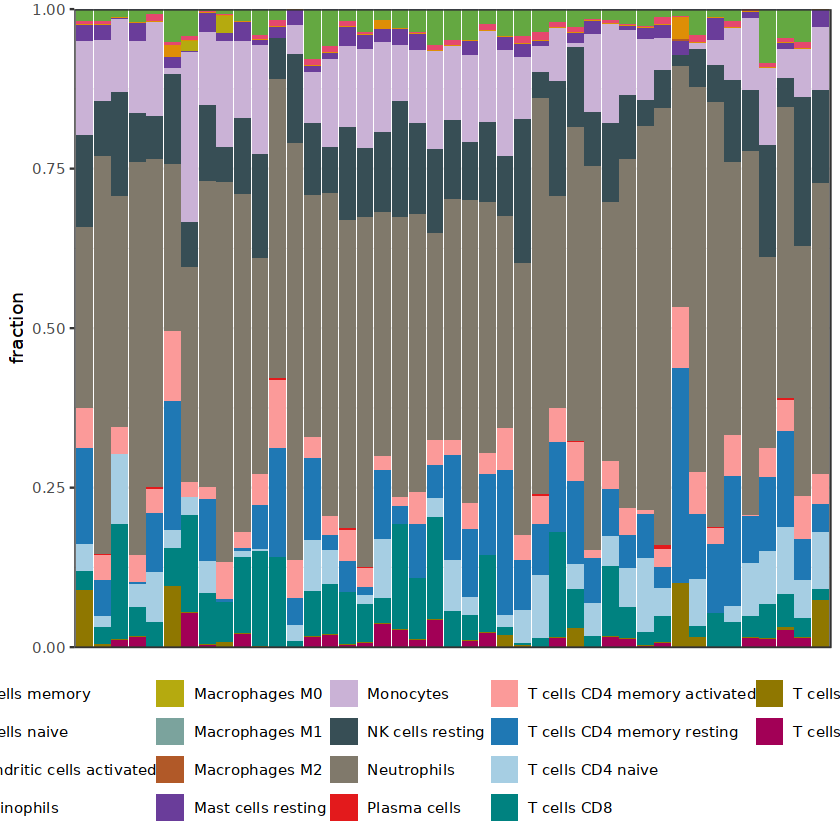

In [42]:
p1 <- cibersort_long %>% 
  ggplot(aes(ID,fraction))+
  geom_bar(stat = "identity",position = "stack",aes(fill=cell_type))+
  labs(x=NULL)+
  scale_y_continuous(expand = c(0,0))+
  scale_fill_manual(values = palette4,name=NULL)+ # iobr还给大家准备了几个色盘，贴心！
  theme_bw()+
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position = "bottom"
        )
p1

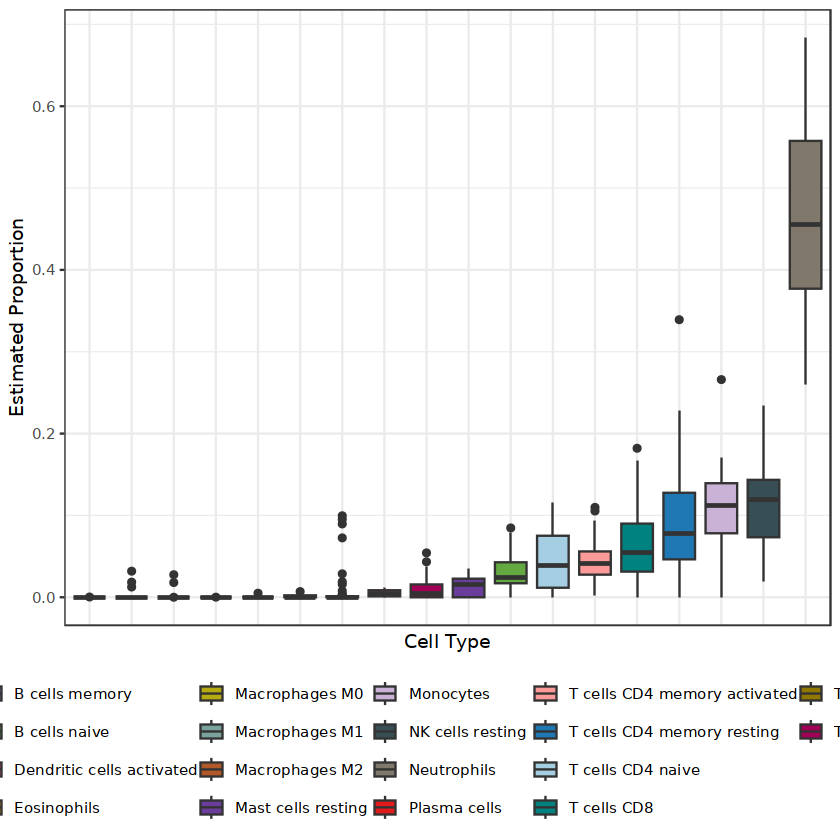

In [45]:
library(forcats)

p2 <- ggplot(cibersort_long,aes(fct_reorder(cell_type, fraction),fraction,fill = cell_type)) + 
  geom_boxplot() + 
  #geom_jitter(width = 0.2,aes(color=cell_type))+
  theme_bw() + 
  labs(x = "Cell Type", y = "Estimated Proportion") +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position = "bottom") + 
  scale_fill_manual(values = palette4)
p2

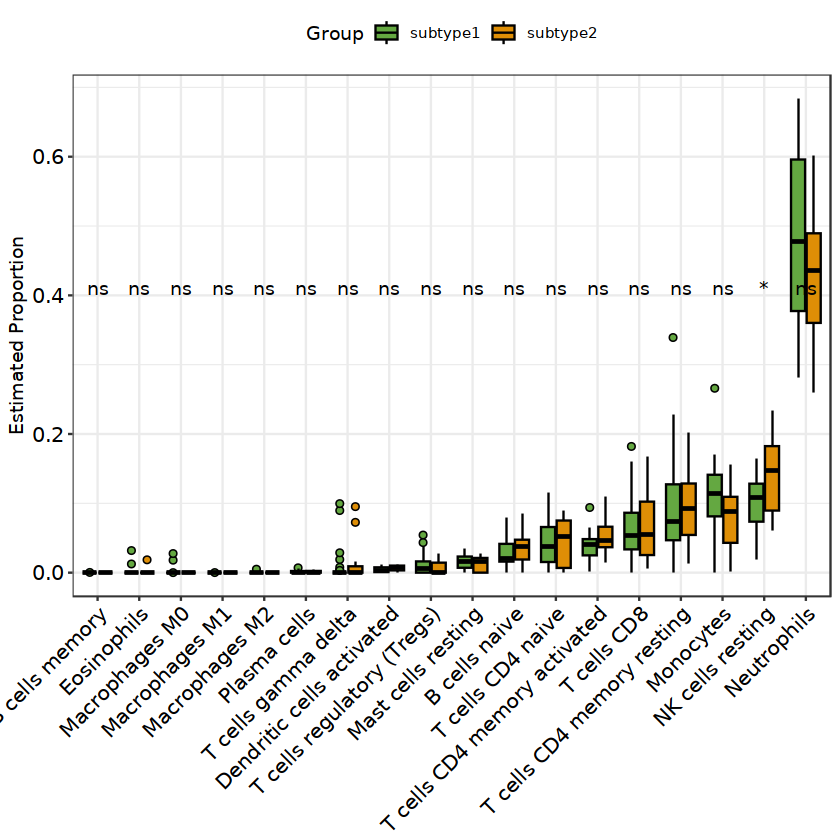

In [52]:
library(ggpubr)
library(stringr)

# 分组
cibersort_long$Group = cibersort_long$group

p3 <- ggplot(cibersort_long,aes(fct_reorder(cell_type,fraction),fraction,fill = Group)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  scale_fill_manual(values = palette1[c(2,4)])+ 
  theme_bw() + 
  labs(x = NULL, y = "Estimated Proportion") +
  theme(legend.position = "top") + 
  theme(axis.text.x = element_text(angle=45,hjust = 1),
        axis.text = element_text(color = "black",size = 12))+
  stat_compare_means(aes(group = Group,label = ..p.signif..),
                     method = "kruskal.test",label.y = 0.4)
p3